In [21]:
import pandas as pd     
import seaborn as sns 

#Importando dados
clientes = pd.read_csv('clientes.csv')

print(clientes.shape)

print(clientes.describe())

#Substituindo por número
clientes['sexo']= clientes['sexo'].map({'Male':0, 'Female':1})
clientes['estado_civil']= clientes['estado_civil'].map({'No':0, 'Yes':1})
clientes['aprovacao_emprestimo']= clientes['aprovacao_emprestimo'].map({'N':0, 'Y':1})

#Tirar valores nulos
clientes = clientes.dropna()

X = clientes[['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']]
y = clientes.aprovacao_emprestimo
X.shape, y.shape

#Importando amostragem de dados
from sklearn.model_selection import train_test_split

# Amostragem
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2)

(614, 13)
              renda  emprestimo  prestacao_mensal  historico_credito
count    614.000000  592.000000         600.00000         564.000000
mean    5403.459283  146.412162         342.00000           0.842199
std     6109.041673   85.587325          65.12041           0.364878
min      150.000000    9.000000          12.00000           0.000000
25%     2877.500000  100.000000         360.00000           1.000000
50%     3812.500000  128.000000         360.00000           1.000000
75%     5795.000000  168.000000         360.00000           1.000000
max    81000.000000  700.000000         480.00000           1.000000


In [22]:
## Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier 

maquina = RandomForestClassifier() 
maquina.fit(x_train, y_train)

#Importando a Métrica de Avaliação
from sklearn.metrics import accuracy_score

#Avaliando a Acurácia com dados de treino
pred_maquina = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina)

1.0

In [23]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina)

0.7291666666666666

In [24]:
#Criando hiperparâmetro (maxdepth)
maquina = RandomForestClassifier(max_depth=4, random_state = 7) 
maquina.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [25]:
#Avaliando a Acurácia com os dados de Treino
pred_maquina_treino = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina_treino)

0.8255208333333334

In [26]:
#Avaliando a Acurácia com dados de Teste
pred_maquina_teste = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina_teste)

0.7916666666666666

In [27]:
#Importância das Variáveis
maquina.feature_importances_

array([0.01480258, 0.04542418, 0.15670005, 0.19086602, 0.59220717])

[0.01480258 0.04542418 0.15670005 0.19086602 0.59220717]


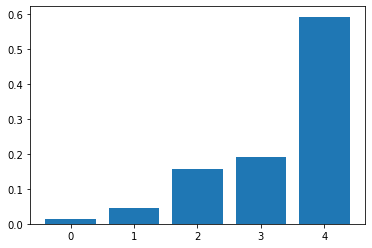

In [28]:
#Gráfico de importância 
print(maquina.feature_importances_)

from matplotlib import pyplot
pyplot.bar(range(len(maquina.feature_importances_)), maquina.feature_importances_)
pyplot.show()

#['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']